In [10]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 8)

In [11]:

import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error


In [12]:
df_train = pd.read_csv('../../LightGBM/examples/regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv('../../LightGBM/examples/regression/regression.test', header=None, sep='\t')

In [13]:
y_train = df_train[0].values
y_test = df_test[0].values
X_train = df_train.drop(0, axis=1).values
X_test = df_test.drop(0, axis=1).values

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [14]:
# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

In [15]:
print('Start training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=['f' + str(i + 1) for i in range(28)],
    categorical_feature=[21],
    evals_result=evals_result,
    verbose_eval=10
)

Start training...
[10]	training's l2: 0.217995	training's l1: 0.457448	valid_1's l2: 0.21641	valid_1's l1: 0.456464
[20]	training's l2: 0.205099	training's l1: 0.436869	valid_1's l2: 0.201616	valid_1's l1: 0.434057
[30]	training's l2: 0.197421	training's l1: 0.421302	valid_1's l2: 0.192514	valid_1's l1: 0.417019
[40]	training's l2: 0.192856	training's l1: 0.411107	valid_1's l2: 0.187258	valid_1's l1: 0.406303
[50]	training's l2: 0.189593	training's l1: 0.403695	valid_1's l2: 0.183688	valid_1's l1: 0.398997
[60]	training's l2: 0.187043	training's l1: 0.398704	valid_1's l2: 0.181009	valid_1's l1: 0.393977
[70]	training's l2: 0.184982	training's l1: 0.394876	valid_1's l2: 0.178803	valid_1's l1: 0.389805
[80]	training's l2: 0.1828	training's l1: 0.391147	valid_1's l2: 0.176799	valid_1's l1: 0.386476
[90]	training's l2: 0.180817	training's l1: 0.388101	valid_1's l2: 0.175775	valid_1's l1: 0.384404
[100]	training's l2: 0.179171	training's l1: 0.385174	valid_1's l2: 0.175321	valid_1's l1: 0.3

Plot metrics recorded during training...


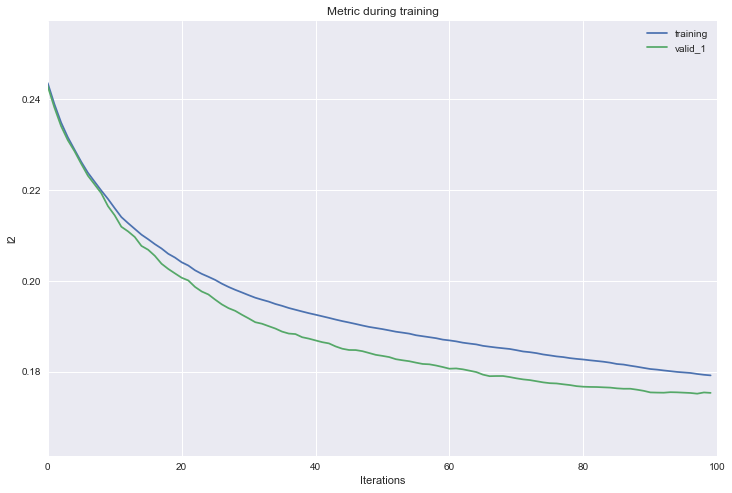

In [34]:
print('Plot metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l2')
plt.show()

Plot feature importances...


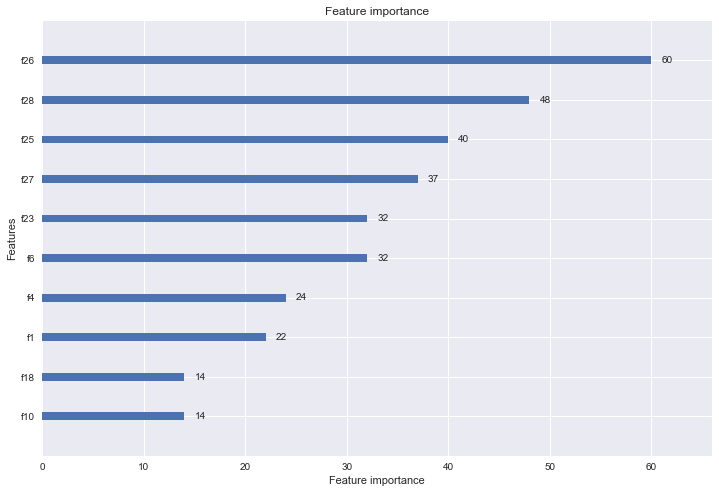

In [17]:
print('Plot feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

Plot 84th tree with graphviz...


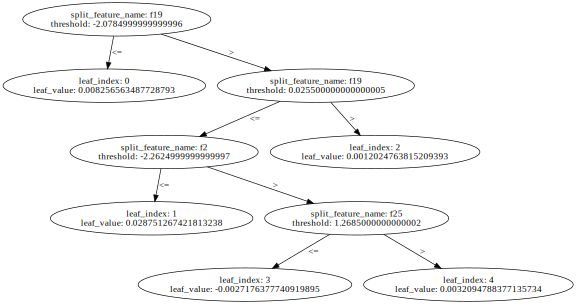

In [31]:
print('Plot 84th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=83, name='Tree84', format='png')
graph.attr(size='8,5')
graph

graphviz.dot.Digraph

In [35]:
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)


[1]	valid_0's l1: 0.491735	valid_0's l2: 0.242763
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.486563	valid_0's l2: 0.237895
[3]	valid_0's l1: 0.481489	valid_0's l2: 0.233277
[4]	valid_0's l1: 0.476848	valid_0's l2: 0.22925
[5]	valid_0's l1: 0.47305	valid_0's l2: 0.226155
[6]	valid_0's l1: 0.469049	valid_0's l2: 0.222963
[7]	valid_0's l1: 0.465556	valid_0's l2: 0.220364
[8]	valid_0's l1: 0.462208	valid_0's l2: 0.217872
[9]	valid_0's l1: 0.458676	valid_0's l2: 0.215328
[10]	valid_0's l1: 0.454998	valid_0's l2: 0.212743
[11]	valid_0's l1: 0.452047	valid_0's l2: 0.210805
[12]	valid_0's l1: 0.449158	valid_0's l2: 0.208945
[13]	valid_0's l1: 0.44608	valid_0's l2: 0.206986
[14]	valid_0's l1: 0.443554	valid_0's l2: 0.205513
[15]	valid_0's l1: 0.440643	valid_0's l2: 0.203728
[16]	valid_0's l1: 0.437687	valid_0's l2: 0.201865
[17]	valid_0's l1: 0.435454	valid_0's l2: 0.200639
[18]	valid_0's l1: 0.433288	valid_0's l2: 0.199522
[19]	valid_0's l1: 0.431297	valid

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.05, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=20, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [37]:
print('Feature importances:', list(gbm.feature_importances_))

Feature importances: [23, 7, 0, 33, 5, 56, 9, 1, 1, 21, 2, 5, 1, 19, 9, 6, 1, 10, 4, 10, 0, 31, 61, 4, 48, 102, 52, 79]
